In [80]:
import networkx as nx

In [81]:
#definitions
#gives adjacency dictionary
edge_dict={}
def create_edge_dict(graph):
    for i, n in G.adjacency():
        # print("i is",i)
        # print("n is",n)
        edge_dict[i] = list(n)
    return edge_dict

# gives the parent of the value in a nested dictionary
def find_key(d, value):
    start_list =[]
    for i in value:
        # print("i is", i)
        for k,v in d.items():
            # print("k and v is", k,v)
            if v['name'] == i:
                # print("k is", k)
                start_list.append(i)
    return start_list

#gives the value of type key of a node
def retrieve_type(list):
    type_list = []
    for i in list:
        # print ("i is", i)
        type = nodes[i]['type']
        # print(tag)
        type_list.append(type)
    return (type_list)

In [82]:
nodes={ 80: {"tag": 1, "units": None, "name": 80, "use_frequency": "M", "type": None}, 
        81: {"tag": 1, "units": None, "name": 81, "use_frequency": "M", "type": None},
        84: {"tag": 3, "units": None, "name": 84, "use_frequency": "M", "type": None}, 
        85: {"tag": 3, "units": None, "name": 85, "use_frequency": "D", "type": None}, 
        86: {"tag": None, "units": None},
        99: {"tag": None, "units": None, "name": 99, "use_frequency": "M", "type": None},
        119: {"tag": None, "units": None, "name": 119, "use_frequency": "M", "type": None},
        141: {"tag": None, "units": None, "name": 141, "use_frequency": "M", "type": None},
        172: {"tag": None, "units": None, "name": 172, "use_frequency": "M", "type": None},
        180: {"tag": None, "units": None, "name": 180, "use_frequency": "D", "type": None},
        117: {"tag": None, "units": None,"name": 117, "use_frequency": "D", "type": None}, 
        122: {"tag": None, "units": None, "name": 122, "use_frequency": "M", "type": None},
        123: {"tag": None, "units": None, "name": 123, "use_frequency": "D", "type": None}
        }
edges = [[81,84],[84,99],[84,122],[99,119],[119,141],[141,172],[81,80],[80,85],[85,123],[85,180],[180,117],[81,122],[123,80]]

{81: [84, 80, 122], 84: [81, 99, 122], 99: [84, 119], 122: [84, 81], 119: [99, 141], 141: [119, 172], 172: [141], 80: [81, 85, 123], 85: [80, 123, 180], 123: [85, 80], 180: [85, 117], 117: [180]}


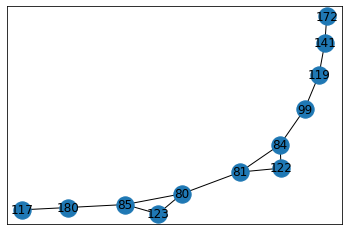

In [83]:
#draw the graph
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)

nx.draw_networkx(G, pos)

#get adjacency dictionary
edge_dict = create_edge_dict(G)
print(edge_dict)

In [84]:
# find stair nodes
stair_nodes=[]
for i in nodes:
        if nodes[i]["tag"]==3:
            stair_nodes.append(i)
print(stair_nodes)

[84, 85]


In [85]:
# find street nodes
street_nodes=[]
for i in nodes:
    if nodes[i]["tag"]==1:
        street_nodes.append(i)
print(street_nodes)

[80, 81]


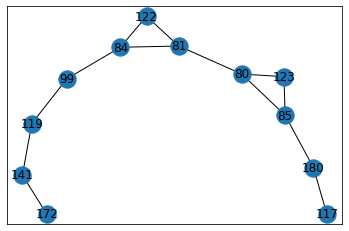

In [86]:
for i in street_nodes:
    node=i
    radius=5
stair_radius = nx.generators.ego_graph(G, node, radius=radius)
nx.draw_networkx(stair_radius)

In [87]:
# get nodes to occupy from the graph
stair_nodes=list(stair_radius.nodes)
print(stair_nodes)

[81, 84, 99, 122, 119, 141, 172, 80, 85, 123, 180, 117]


In [88]:
# remove street nodes
for k in stair_nodes:
    for i in street_nodes:
        if i == k:
            stair_nodes.remove(k)
stair_nodes

[84, 99, 122, 119, 141, 172, 85, 123, 180, 117]

In [89]:
# remove street neighboring nodes from neighboring nodes
for i in stair_nodes:
    for k in street_nodes:
        for j in edge_dict[k]:
            if j==i:
                # print(i)
                stair_nodes.remove(i)
stair_nodes

[99, 119, 141, 172, 123, 180, 117]

In [90]:
# add "tag" attribute to nodes
for i in stair_nodes:
    nodes[i]["tag"]=3

In [91]:
nodes

{80: {'tag': 1, 'units': None, 'name': 80, 'use_frequency': 'M', 'type': None},
 81: {'tag': 1, 'units': None, 'name': 81, 'use_frequency': 'M', 'type': None},
 84: {'tag': 3, 'units': None, 'name': 84, 'use_frequency': 'M', 'type': None},
 85: {'tag': 3, 'units': None, 'name': 85, 'use_frequency': 'D', 'type': None},
 86: {'tag': None, 'units': None},
 99: {'tag': 3, 'units': None, 'name': 99, 'use_frequency': 'M', 'type': None},
 119: {'tag': 3,
  'units': None,
  'name': 119,
  'use_frequency': 'M',
  'type': None},
 141: {'tag': 3,
  'units': None,
  'name': 141,
  'use_frequency': 'M',
  'type': None},
 172: {'tag': 3,
  'units': None,
  'name': 172,
  'use_frequency': 'M',
  'type': None},
 180: {'tag': 3,
  'units': None,
  'name': 180,
  'use_frequency': 'D',
  'type': None},
 117: {'tag': 3,
  'units': None,
  'name': 117,
  'use_frequency': 'D',
  'type': None},
 122: {'tag': None,
  'units': None,
  'name': 122,
  'use_frequency': 'M',
  'type': None},
 123: {'tag': 3,
  'un